# Books analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
books = pd.read_csv('data/goodreads_library_export.csv')

In [4]:
rd_books = books[books['Exclusive Shelf']=='read']
rd_books.columns

Index(['Book Id', 'Title', 'Author', 'Author l-f', 'Additional Authors',
       'ISBN', 'ISBN13', 'My Rating', 'Average Rating', 'Publisher', 'Binding',
       'Number of Pages', 'Year Published', 'Original Publication Year',
       'Date Read', 'Date Added', 'Bookshelves', 'Bookshelves with positions',
       'Exclusive Shelf', 'My Review', 'Spoiler', 'Private Notes',
       'Read Count', 'Recommended For', 'Recommended By', 'Owned Copies',
       'Original Purchase Date', 'Original Purchase Location', 'Condition',
       'Condition Description', 'BCID'],
      dtype='object')

In [34]:
# dropping some columns i'm not going to use
rd_books = rd_books.drop(['Publisher','Additional Authors','Binding','My Review','Spoiler', 'Private Notes',
       'Read Count', 'Recommended For', 'Recommended By', 'Owned Copies',
       'Original Purchase Date', 'Original Purchase Location', 'Condition',
       'Condition Description', 'BCID'],axis=1)

In [6]:
plt.style.use('ggplot')
plt.set_cmap('twilight')

<Figure size 432x288 with 0 Axes>

Text(1972.8232189973614, 100, 'mean year = 2001')

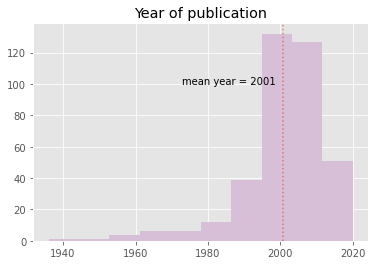

In [9]:
fig, ax = plt.subplots()
plt.hist(rd_books['Year Published'],color='thistle')
plt.title('Year of publication')
mn_year = np.mean(rd_books['Year Published'])
ax.axvline(mn_year, alpha = 0.65, ymax = 100, linestyle = ":")
ax.text(mn_year-28, 100,'mean year = {0:.4g}'.format(mn_year))

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

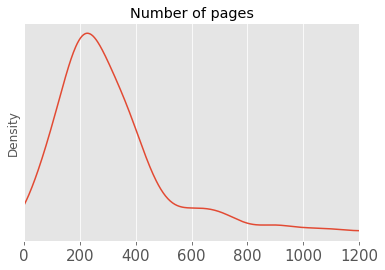

In [11]:
# fig, ax = plt.subplots()
# rd_books['Number of Pages'].plot(kind='kde')
# ax.set_xlim([0,1200])
# plt.title('Number of pages')
# mn_pg = np.mean(rd_books['Number of Pages'])
# ax.get_yaxis().set_ticks([])
# plt.xticks(fontsize=15)
#ax.axvline(mn_pg, alpha = 0.85, ymax = 100, linestyle = ":", color = 'black')
#plt.text(mn_pg, 1,'mean = {0:.4g} pages'.format(mn_pg),transform=ax.transData)

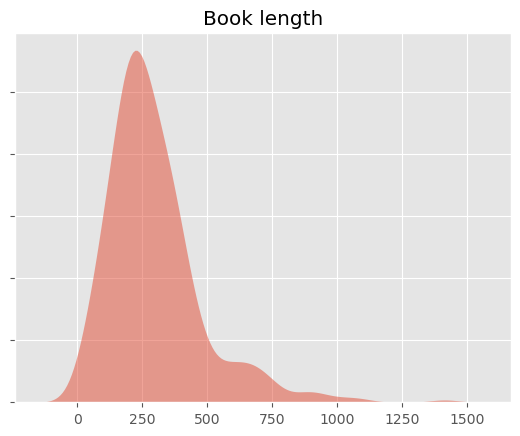

In [76]:
import seaborn as sns
plt.style.use('ggplot')
g1 = sns.kdeplot(rd_books['Number of Pages'], palette="crest", fill=True,alpha=.5, linewidth=0)
g1.set(yticklabels=[])
g1.set(ylabel='')
g1.set(xlabel='')
plt.title('Book length')
plt.savefig('figs/pages.png')

In [ ]:
import seaborn as sns
plt.style.use('ggplot')
g1 = sns.kdeplot(rd_books['Number of Pages'], palette="crest", fill=True,alpha=.5, linewidth=0)
g1.set(yticklabels=[])
g1.set(ylabel='')
g1.set(xlabel='')
plt.title('Book length')
plt.savefig('figs/pages.png')

In [13]:
total_books = len(rd_books)
num_pg = sum(rd_books['Number of Pages'].dropna())

In [39]:
# weird bug here - read dates aren't correct - developers of goodreads are aware and can't fix this apparently
rd_books['Date Read'] = pd.to_datetime(rd_books['Date Read'])
rd_books['Date Added'] = pd.to_datetime(rd_books['Date Added'])
dates = rd_books['Date Read'].dropna()

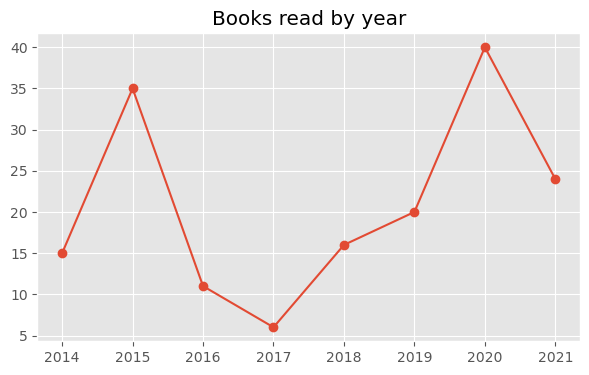

In [83]:
# manually create a dataframe
fig  = plt.figure()
years = list(range(2014,2022))
num = [15,35,11,6,16,20,40,24]
rd_year = [list(i) for i in zip(years,num)]
rd_df = pd.DataFrame(rd_year, columns = ['Year', 'Number'])
plt.plot(rd_df['Year'],rd_df['Number'],'o-')
fig.set_size_inches(7, 4)
plt.title('Books read by year')
plt.savefig('figs/years.png')

In [84]:
# Most loved authors
set(rd_books[rd_books['My Rating']==5]['Author'])

{'Al Columbia',
 'Arthur Rimbaud',
 'Donna Tartt',
 'Edgar Allan Poe',
 'Hermann Hesse',
 'Jean-Paul Sartre',
 'John Berger',
 'Junji Ito',
 'Liu Cixin',
 'Mikhail Bulgakov',
 'Stanisław Lem',
 'Ted Chiang',
 'Vladimir Nabokov',
 'Yukio Mishima'}

In [85]:
# Get ISBNs for later use
isbns = rd_books['ISBN']
isbns.replace('=""', np.nan, inplace=True)
isbns.dropna(inplace=True)

In [86]:
# reformat isbns
import re
for i,v in enumerate(isbns):
    isbns[i] = re.sub(r'\W+', '', v)

In [87]:
bksh = rd_books['Bookshelves'].dropna().ravel()
shelves = np.array(' '.join(bksh).split(' '))
shelves = [x.replace(',','') for x in shelves]
shelves = [x.replace('-', ' ') for x in shelves]

In [91]:
labels, counts = np.unique(shelves, return_counts=True)
rm = []
rm.append(np.where(labels=='math')[0][0])
rm.append(np.where(labels=='neuro')[0][0])
rm.append(np.where(labels=='c russia')[0][0])
rm.append(np.where(labels=='c japan')[0][0])
rm.append(np.where(labels=='favorites')[0][0])
labels = np.delete(labels,rm)
counts = np.delete(counts,rm)

In [92]:
explode = []
for x in counts:
    if x > 10: 
        explode.append(0)
    else: explode.append(0.2)
explode = tuple(explode)

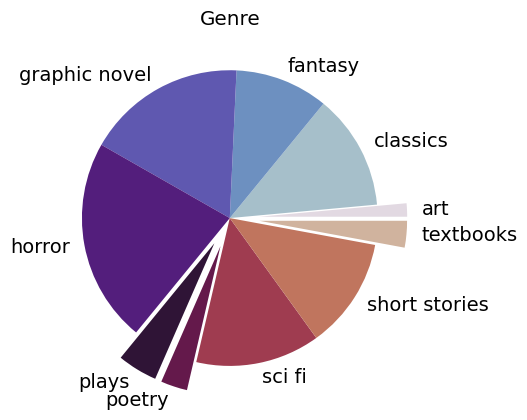

In [94]:
colors = plt.cm.twilight(np.arange(100)/10.)
plt.pie(counts,labels=labels,colors=colors,explode=explode,textprops={'fontsize': 14})
plt.title('Genre')
plt.savefig('figs/genres.png')

In [722]:
!conda create -n my_env geopandas ipykernel -y

Solving environment: done

## Package Plan ##

  environment location: /Users/nika/.conda/envs/my_env

  added / updated specs:
    - geopandas
    - ipykernel


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    appnope-0.1.2              |py37hecd8cb5_1001          10 KB
    attrs-21.2.0               |     pyhd3eb1b0_0          46 KB
    aws-c-common-0.4.57        |       hb1e8313_1         140 KB
    aws-c-event-stream-0.1.6   |       h23ab428_5          21 KB
    aws-checksums-0.1.9        |       hb1e8313_0          47 KB
    aws-sdk-cpp-1.8.185        |       he271ece_0         1.6 MB
    backcall-0.2.0             |     pyhd3eb1b0_0          13 KB
    bottleneck-1.3.2           |   py37hf1fa96c_1         107 KB
    brotli-1.0.9               |       hb1e8313_2         398 KB
    ca-certificates-2021.7.5   |       hecd8cb5_1         113 KB
    cairo-1.16.0               |       h8023

In [729]:
!python -m ipykernel install --user --name=my_env

Installed kernelspec my_env in /Users/nika/Library/Jupyter/kernels/my_env


In [96]:
# using a new environment for geopandas
import geopandas
import pandas as pd
import requests
import numpy as np

In [98]:
books = pd.read_csv('data/goodreads_library_export.csv')
rd_books = books[books['Exclusive Shelf']=='read']
desc = []
for author in rd_books['Author']:
    url = 'https://www.wikidata.org/w/api.php'
    params = {
        'action': 'wbsearchentities',
        'format': 'json',
        'language': 'en',
        'search': author
    }
    r = requests.get(url, params = params)
    try:
        desc.append(r.json()['search'][0]['description'])
    except:
        continue

In [99]:
origin = []
for x in desc:
    x = x.split(' ')
    origin.append(x[0])

In [100]:
demonyms = pd.read_csv('data/demonyms.csv',header = None,names=['name','country'])

In [101]:
countries = []
for x in origin:
    idx = np.where(demonyms['name']==x)[0]
    if len(idx) > 0:
        countries.append(demonyms['country'][idx].to_list()[0])

In [102]:
# fixing names and preparing for geopandas
for i, c in enumerate(countries):
    if c == 'Bohemia':
        countries[i] = 'Czechia'
    if c == 'United States':
        countries[i] = 'United States of America'
    if c == 'England':
        countries[i] = 'United Kingdom'  
    if c == 'Soviet Union':
        countries[i] = 'Russia'
    if c == 'Scotland':
        countries[i] = 'United Kingdom'  

In [103]:
from collections import Counter
count = Counter(countries)
count_df = pd.DataFrame.from_dict(count, orient='index').reset_index()
count_df.columns = ['name', 'count']

In [104]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
count_df = count_df.sort_values(by='name')
count_df

,name,count
3,Argentina,1
13,Armenia,1
16,Australia,2
18,Austria,1
11,Canada,2
12,China,2
7,Czechia,2
19,Finland,3
9,France,13
8,Germany,2


In [105]:
world = world.sort_values(by='name')
df  = world.merge(count_df, on='name', how='right')

In [106]:
gdf = geopandas.GeoDataFrame(df,geometry=df.geometry)

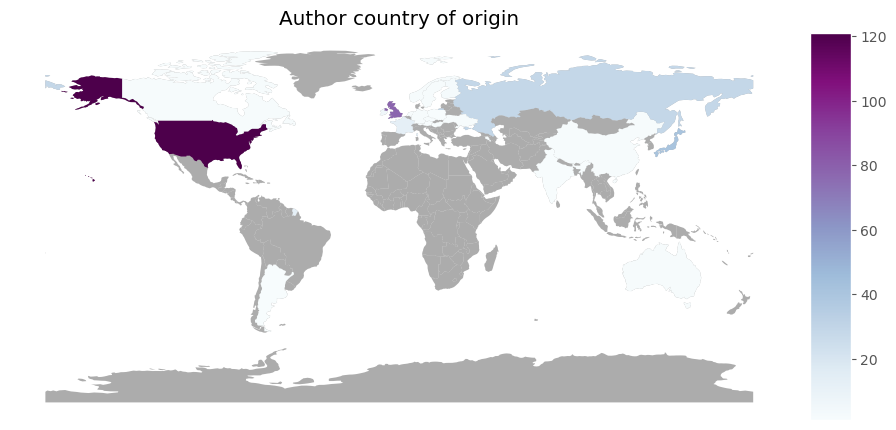

In [107]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig,ax = plt.subplots(1,1,sharex=True,sharey=True,figsize=(11,11))
world.plot(ax=ax,color='grey',alpha=0.65)
plt.title('Author country of origin')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
gdf.plot(ax=ax,column='count',legend=True,cax=cax,cmap='BuPu');
ax.axis('off')
plt.savefig('map.png')

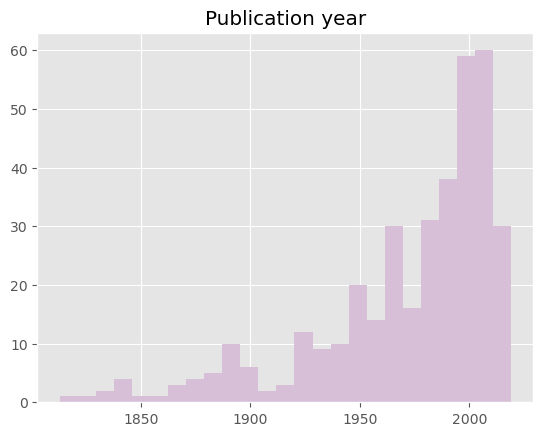

In [154]:
pub_years = rd_books[rd_books['Original Publication Year'] > 1800]['Original Publication Year']
plt.hist(pub_years,bins=25,color='thistle')
plt.title('Publication year')
plt.savefig('figs/pub_year.png')

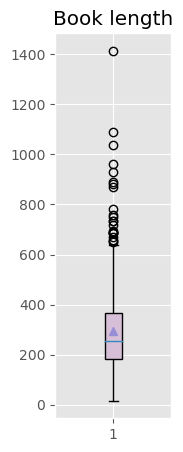

In [195]:
fig = plt.figure(figsize=(1.5,5))
plt.grid(True)
plt.title('Book length')
box1 = plt.boxplot(rd_books['Number of Pages'].dropna(),showmeans=True,patch_artist=True)
plt.setp(box1["boxes"], facecolor='thistle')
plt.setp(box1["fliers"], markeredgecolor='black')
plt.savefig('figs/length.png')

In [197]:
total = len(rd_books)
total_pg = sum(rd_books['Number of Pages'].dropna())

In [15]:
rating = rd_books[rd_books['My Rating']>=1]['My Rating']
np.mean(rating)

3.5280528052805282

In [10]:
rd_books[rd_books['My Rating']==0]

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,...,Private Notes,Read Count,Recommended For,Recommended By,Owned Copies,Original Purchase Date,Original Purchase Location,Condition,Condition Description,BCID
15,27822,Eugene Onegin,Alexander Pushkin,"Pushkin, Alexander",James E. Falen,"=""0192838997""","=""9780192838995""",0,4.10,Oxford University Press,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
18,400412,The Waste Land and Other Poems,T.S. Eliot,"Eliot, T.S.",NaN,"=""015694877X""","=""9780156948777""",0,4.21,Harcourt Brace Jovanovich,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
24,968,"The Da Vinci Code (Robert Langdon, #2)",Dan Brown,"Brown, Dan",NaN,"=""""","=""""",0,3.87,Anchor,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
26,17397466,An Introduction to Statistical Learning: With ...,Gareth James,"James, Gareth","Trevor Hastie, Robert Tibshirani, Daniela Witten","=""1461471370""","=""9781461471370""",0,4.61,Springer,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
29,818045,Dynamical Systems in Neuroscience: The Geometr...,Eugene M. Izhikevich,"Izhikevich, Eugene M.",NaN,"=""0262090430""","=""9780262090438""",0,4.33,MIT Press (MA),...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,62803,The Life and Death of Yukio Mishima,Henry Scott Stokes,"Stokes, Henry Scott",NaN,"=""0815410743""","=""9780815410744""",0,3.86,Cooper Square Press,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
643,158887,The Glass Cell,Patricia Highsmith,"Highsmith, Patricia",NaN,"=""0393325679""","=""9780393325676""",0,3.74,W. W. Norton Company,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
729,508262,Understanding Sleep and Dreaming,William H. Moorcroft,"Moorcroft, William H.",NaN,"=""0387249656""","=""9780387249650""",0,3.39,Springer,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
736,13167087,"This Is How: Proven Aid in Overcoming Shyness,...",Augusten Burroughs,"Burroughs, Augusten",NaN,"=""0312563558""","=""9780312563554""",0,3.66,St. Martin's Press,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
